# Table of Contents

- [Install and import](#install-and-import-all-necessary-libraries)     
- [Detailed pipeline invoke](#pipeline-detailed-example)
  - [Prepare data](#dataset-preparation)
  - [Initialize, train and test classifier](#initialize-train-and-test-classifier)
  - [Predict from folder by custom path](#custom-input-prediction)

- [Command-line invoke](#command-line-invoke)

# Install and import all necessary libraries

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import random
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

from src.data_process import load_mnist_dataset, get_dataloader, prepare_custom_input, print_predictions
from src.classifiers import MnistClassifier

# Pipeline detailed example

## Dataset preparation

In [3]:
# transforms to pytorch tensors and normalize
img_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,)),
     ])

# create Dataset classes for train and test MNIST data
train_dataset, test_dataset = load_mnist_dataset(img_transforms)
print(f'Train dataset size: {len(train_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 60000
Test dataset size: 10000


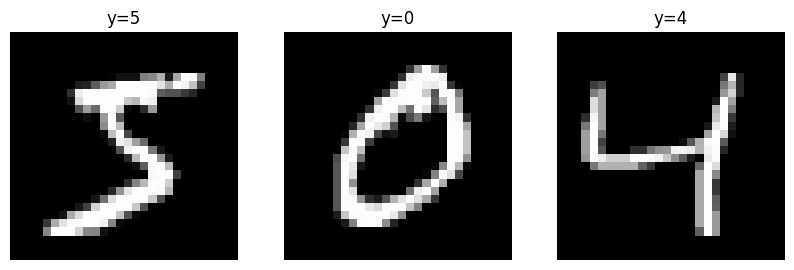

In [4]:
# Plot first 3 images from train dataset

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i in range(3):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"y={label}")
    axes[i].axis("off")

plt.show()

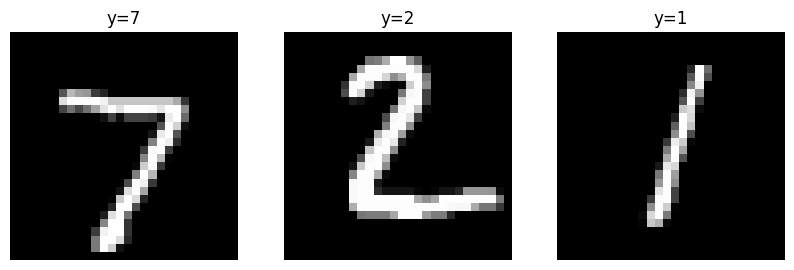

In [5]:
# Plot first 3 images from test dataset

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i in range(3):
    image, label = test_dataset[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"y={label}")
    axes[i].axis("off")

plt.show()

In [6]:
# Create dataloaders for train and test datasets

train_dataloader = get_dataloader(train_dataset, 64)
test_dataloader = get_dataloader(test_dataset, 64)

## Initialize, train and test classifier

Training CNN...
Epoch 1: loss = 0.1431313843412602
Epoch 2: loss = 0.07772851672801953
Epoch 3: loss = 0.06861965489404491
Epoch 4: loss = 0.06266871218118808
Epoch 5: loss = 0.06201961627708958
Epoch 6: loss = 0.061117621974139384
Epoch 7: loss = 0.057779757442120806
Epoch 8: loss = 0.057131418254943056
Epoch 9: loss = 0.0595352190246244
Epoch 10: loss = 0.05069593397573176
Training finished
Performing prediction on test set...
Accuracy 0.9814, macro f1 0.981330001033149
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98   

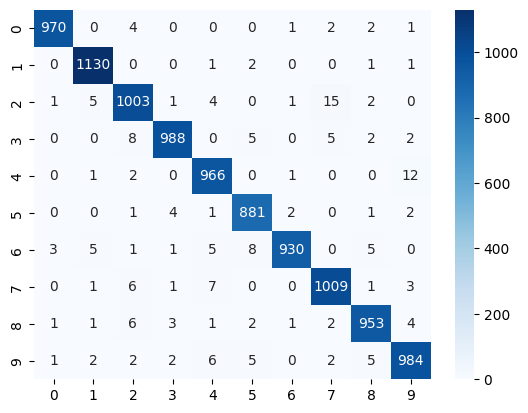

In [7]:
algorithm = 'cnn'  # Select an algorithm type from ['rf', 'nn', 'cnn']
classifier = MnistClassifier(algorithm)  # Create classifier

classifier.train(train_dataloader)  # Train the classifier
y_pred, y_test = classifier.test(test_dataloader)  # Evaluate performance on test dataset

In [8]:
# Get samples that were misclassified, calculate their rate in test data

misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_labels = y_pred[misclassified_indices]

misclassified_percent = len(misclassified_indices) / len(test_dataset) * 100
print(f'Percent of misclassified samples: {misclassified_percent:.2f}%')

Percent of misclassified samples: 1.86%


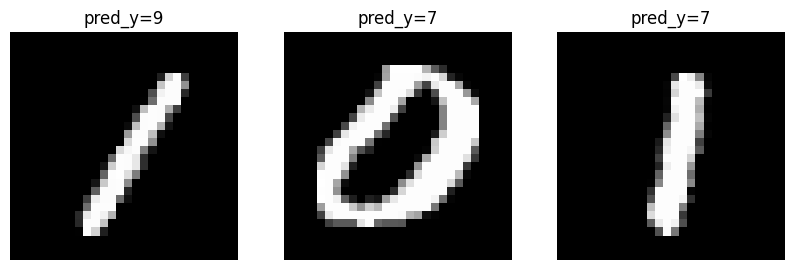

In [9]:
# Plot 3 random misclassified samples

random_misclassified = random.choices(misclassified_indices, k=3)
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, index in enumerate(random_misclassified):
    image, label = test_dataset[index]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"pred_y={misclassified_labels[i]}")
    axes[i].axis("off")

plt.show()

## Custom input prediction

In [10]:
# Simulate custom user input by getting data from folder (also can be performed for one image)

path_to_input = 'sample_custom_data'
image_paths, prepared_data = prepare_custom_input(path_to_input)

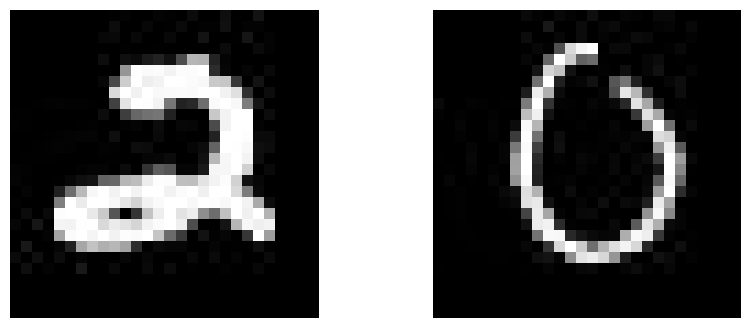

In [12]:
# Sample folder consists of only 2 images, plot them

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    image = prepared_data[i]
    axes[i].imshow(image.numpy()[0], cmap="gray")
    axes[i].axis("off")

plt.show()

In [13]:
# Get model predictions and print them

predictions = classifier.predict(prepared_data)
print_predictions(image_paths, predictions)

Image: 2.jpg, Predicted Label: 2
Image: 0.jpg, Predicted Label: 0


# Command-line invoke

In [1]:
# Example how to train and test Random forest Classifier

!python main.py --alg rf 

Training RFC...
Training finished
Performing prediction on test set...
Accuracy 0.9688, macro f1 0.9685808922347029
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

2025-02-20 17:34:34.988 Python[93633:14696693] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 17:34:34.988 Python[9

In [1]:
# Example how to train and test Feed-Forward Neural Network

!python main.py --alg nn

Training FFN...
Epoch 1: loss = 0.7843042505797801
Epoch 2: loss = 0.3057278026062161
Epoch 3: loss = 0.2462424859563425
Epoch 4: loss = 0.20689868332067532
Epoch 5: loss = 0.17806697241874583
Epoch 6: loss = 0.1556027999012741
Epoch 7: loss = 0.1379305156074893
Epoch 8: loss = 0.12399203438701024
Epoch 9: loss = 0.11226118972370111
Epoch 10: loss = 0.10230745771812445
Epoch 11: loss = 0.09366208213026017
Epoch 12: loss = 0.08584563712627172
Epoch 13: loss = 0.07932163584135425
Epoch 14: loss = 0.0731987185430711
Epoch 15: loss = 0.06783913454708101
Training finished
Performing prediction on test set...
Accuracy 0.9734, macro f1 0.9731885881527758
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       

In [1]:
# Example how to train and test Convolutional Neural Network

!python main.py --alg cnn

Training CNN...
Epoch 1: loss = 1.0248192343423996
Epoch 2: loss = 1.2169149272890487
Epoch 3: loss = 2.3062910029628894
^C
Traceback (most recent call last):
  File "/Users/vika/PycharmProjects/Test/Task1/main.py", line 25, in <module>
    main(algorithm=args.alg, custom_input_path=args.input)
  File "/Users/vika/PycharmProjects/Test/Task1/main.py", line 11, in main
    classifier.train(train_dataloader)
  File "/Users/vika/PycharmProjects/Test/Task1/src/classifiers.py", line 185, in train
    self.classifier.train(train_loader)
  File "/Users/vika/PycharmProjects/Test/Task1/src/classifiers.py", line 143, in train
    outputs = self.model(images)
              ^^^^^^^^^^^^^^^^^^
  File "/Users/vika/PycharmProjects/Test/.venv/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1739, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vika/PycharmProjects/Test/.venv/lib/python3.11/site-packages/torch/nn/

In [2]:
# Example how to train and test Convolutional Neural Network, and then run prediction on folder from custom path

!python main.py --alg cnn --input sample_custom_data

Training CNN...
Epoch 1: loss = 0.3984587057503556
Epoch 2: loss = 0.21344422518825734
Epoch 3: loss = 0.18140796976668366
Epoch 4: loss = 0.15936811937730133
Epoch 5: loss = 0.13732745561566054
Epoch 6: loss = 0.12561608851353115
Epoch 7: loss = 0.11734568060853326
Epoch 8: loss = 0.10858156128666366
Epoch 9: loss = 0.10136016809380552
Epoch 10: loss = 0.10157857806437207
Training finished
Performing prediction on test set...
Accuracy 0.968, macro f1 0.9678924819245598
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.96      0.98      0.97      1135
           2       0.97      0.96      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.93      0.96       892
           6       0.97      0.99      0.98       958
           7       0.98      0.94      0.96      1028
           8       0.93      0.98     